# Notebook to look at correlation among DJIA Stocks

In [1]:
import glob
import os

import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

from deep_rl_asset_allocation.configs import data_config, paths_config

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Load Data from Tickers

In [2]:
CSV_FILENAMES = sorted(glob.glob(os.path.join(paths_config.data_csv_dir, f"daily/*.csv")))

In [3]:
# get ticker names
columns = []
columns.append("Date")
for filename in CSV_FILENAMES:
    # print(f'{filename}')
    # get ticker name
    ticker = filename.split('/')[-1].split(".")[0]
    if ticker == "^DJI":
        columns.append(ticker)
        # print(f'{ticker}')
# init empty df
df = pd.DataFrame(columns=columns)

In [4]:
# get adj close price for each ticker
for filename in CSV_FILENAMES:
    # print(f'{filename}')
    # get ticker name
    ticker = filename.split('/')[-1].split(".")[0]
    if ticker == "^DJI" and ticker in columns:
        # get adj close price
        _temp_df = pd.read_csv(filename)
        dates = _temp_df["Date"].values
        adj_close = _temp_df["close"].values
        df["Date"] = dates
        df[ticker] = adj_close

In [5]:
df.head()

,Date,^DJI
0,2009-01-02,9034.690430
1,2009-01-05,8952.889648
2,2009-01-06,9015.099609
3,2009-01-07,8769.700195
4,2009-01-08,8742.459961


### Plot Historical Prices

In [6]:
def convert_datadate_to_datetime(df):
    date_as_str = str(df['Date'])
    # output is '2009-01-02'
    year, month, day = date_as_str[:4], date_as_str[5:7], date_as_str[8:]
    return pd.Timestamp(year=int(year), month=int(month), day=int(day))

In [7]:
dates = pd.date_range(data_config.TRAINING_START, data_config.TESTING_END, freq='d')
df_dates = pd.DataFrame(index=dates, data=np.zeros(len(dates)), columns=['zeroes'])
type(df_dates.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
training_df = df[(df.Date >= str(data_config.TRAINING_START)) & (df.Date < str(data_config.TRAINING_END))]
validation_df = df[(df.Date >= str(data_config.VALIDATION_START)) & (df.Date < str(data_config.VALIDATION_END))]
testing_df = df[(df.Date >= str(data_config.TESTING_START)) & (df.Date < str(data_config.TESTING_END))]
type(training_df.Date[0])

str

In [ ]:
training_df["Date"] = training_df.apply(convert_datadate_to_datetime, axis=1)
validation_df["Date"] = validation_df.apply(convert_datadate_to_datetime, axis=1)
testing_df["Date"] = testing_df.apply(convert_datadate_to_datetime, axis=1)
type(training_df.Date[0])

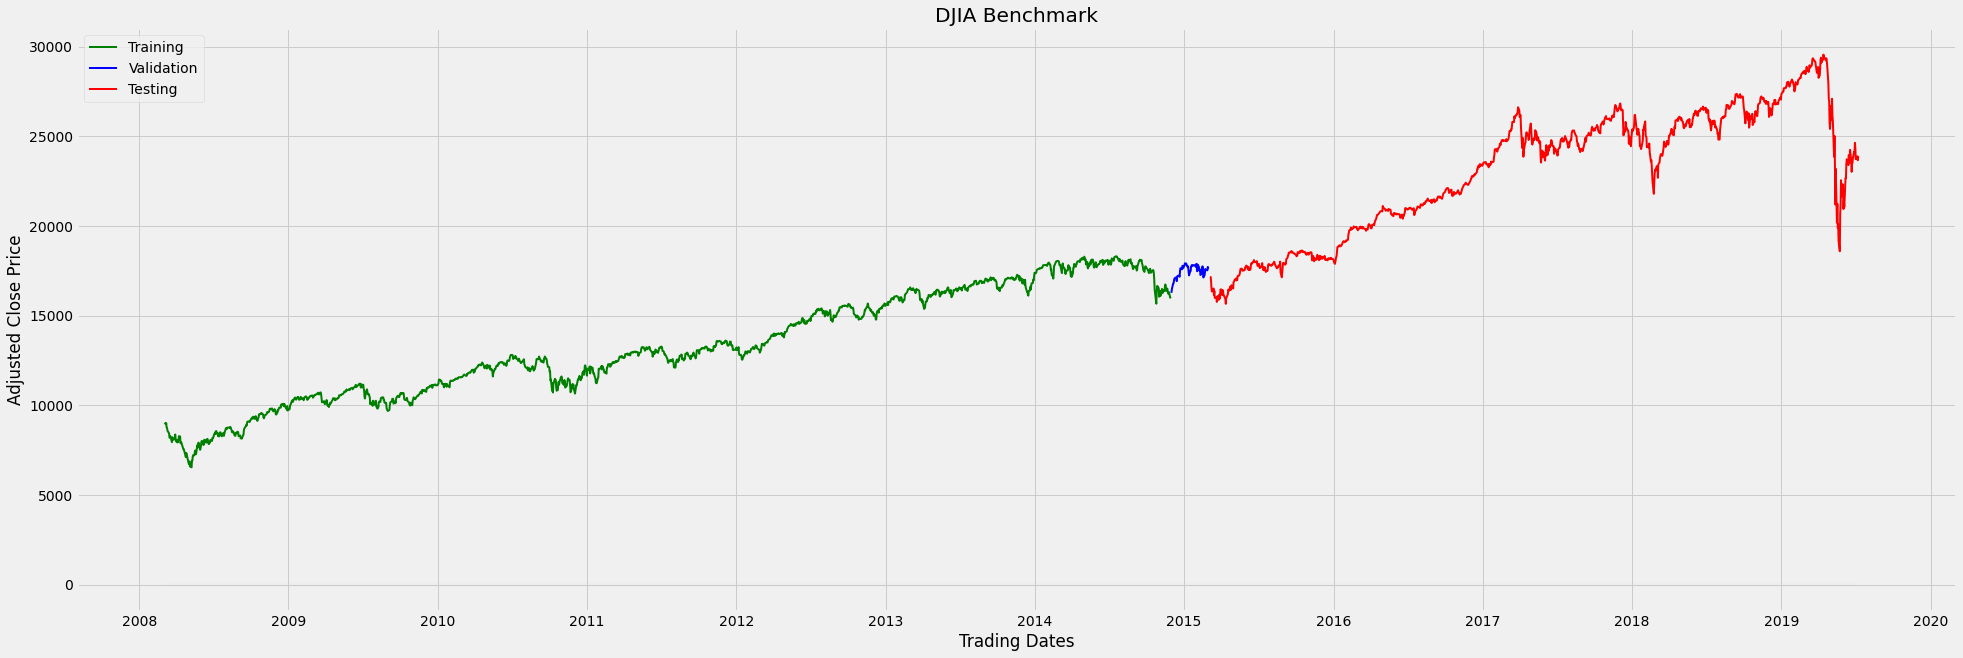

In [11]:
# init the plot
fig, ax = plt.subplots(figsize=(30, 10))
plt.style.use("fivethirtyeight")

ax.set(xlabel="Trading Dates",
       ylabel="Adjusted Close Price",
       title="DJIA Benchmark",
       )

# init plot
ax.plot(df_dates.index, df_dates.zeroes, alpha=0.01)

# plot train, val, and test
ax.plot(training_df["Date"], training_df["^DJI"], 'g', linewidth=2, label="Training")
ax.plot(validation_df["Date"], validation_df["^DJI"], 'b', linewidth=2, label="Validation")
ax.plot(testing_df["Date"], testing_df["^DJI"], 'r', linewidth=2, label="Testing")

# format plot
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))

ax.set_xlim([pd.Timestamp(year=2008, month=6, day=1), pd.Timestamp(year=2021, month=1, day=1)])
plt.legend(loc='upper left')